## Numerical approach to analyse the power function of a Wilcoxon Mann-Whitney test

### Approach

1. Choose a parametric distribution with variance 1 for $X$.
2. Shift it by $\Delta$ to get the distribution of $Y$.
3. Generate a sample of size $n_1 = 10$ from $X$ and a sample of size $n_2=15$ from $Y$.
4. Compute the Wilcoxon Mann-Whitney test statistic $U$.
5. Estimate the power of the test by repeating the above steps many times and calculating the proportion of times the null hypothesis is rejected.
6. Repeat the above steps for different values of $\Delta$ and $\alpha$ to see how the power changes.
7. Plot the power against $\Delta$ for different values of $\alpha$.


In [ ]:
install.packages("extraDistr")
library(extraDistr)

In [ ]:
# Generate X from the Laplace distribution
X <- rlaplace(10, mu=0, sigma=1)
# Generate Y from the Laplace distribution with a shift of delta
Y <- rlaplace(15, mu=2, sigma=1)

# Perform the Wilcoxon test
wilcoxon_test <- wilcox.test(X, Y, alternative="two.sided", exact=TRUE)

In [11]:
attributes(wilcoxon_test)

$names
[1] "statistic"   "parameter"   "p.value"     "null.value"  "alternative"
[6] "method"      "data.name"  

$class
[1] "htest"

In [13]:
# For Y, the easiest to shift X while conserving the variance is using the Laplace distribution

estimate_power <- function(delta, alpha, num_simulations=10000) {
  rejections <- 0

  for (i in 1:num_simulations) {
    # Generate X from the Laplace distribution
    X <- rlaplace(10, mu=0, sigma=1)
    # Generate Y from the Laplace distribution with a shift of delta
    Y <- rlaplace(15, mu=delta, sigma=1)

    # Perform the Wilcoxon test
    wilcoxon_test <- wilcox.test(X, Y, alternative="two.sided", exact=TRUE)

    # count rejections
    if (wilcoxon_test$p.value < alpha) {
      rejections <- rejections + 1
    }
  }
  power = rejections / num_simulations
  return(power)
}

In [14]:
alpha <- c(0.01, 0.05, 0.1)
delta <- seq(0, 5, by=0.5)
power_results <- matrix(0, nrow=length(delta), ncol=length(alpha))
colnames(power_results) <- alpha
rownames(power_results) <- delta

for (i in 1:length(delta)) {
  for (j in 1:length(alpha)) {
    power_results[i, j] <- estimate_power(delta[i], alpha[j])
  }
}

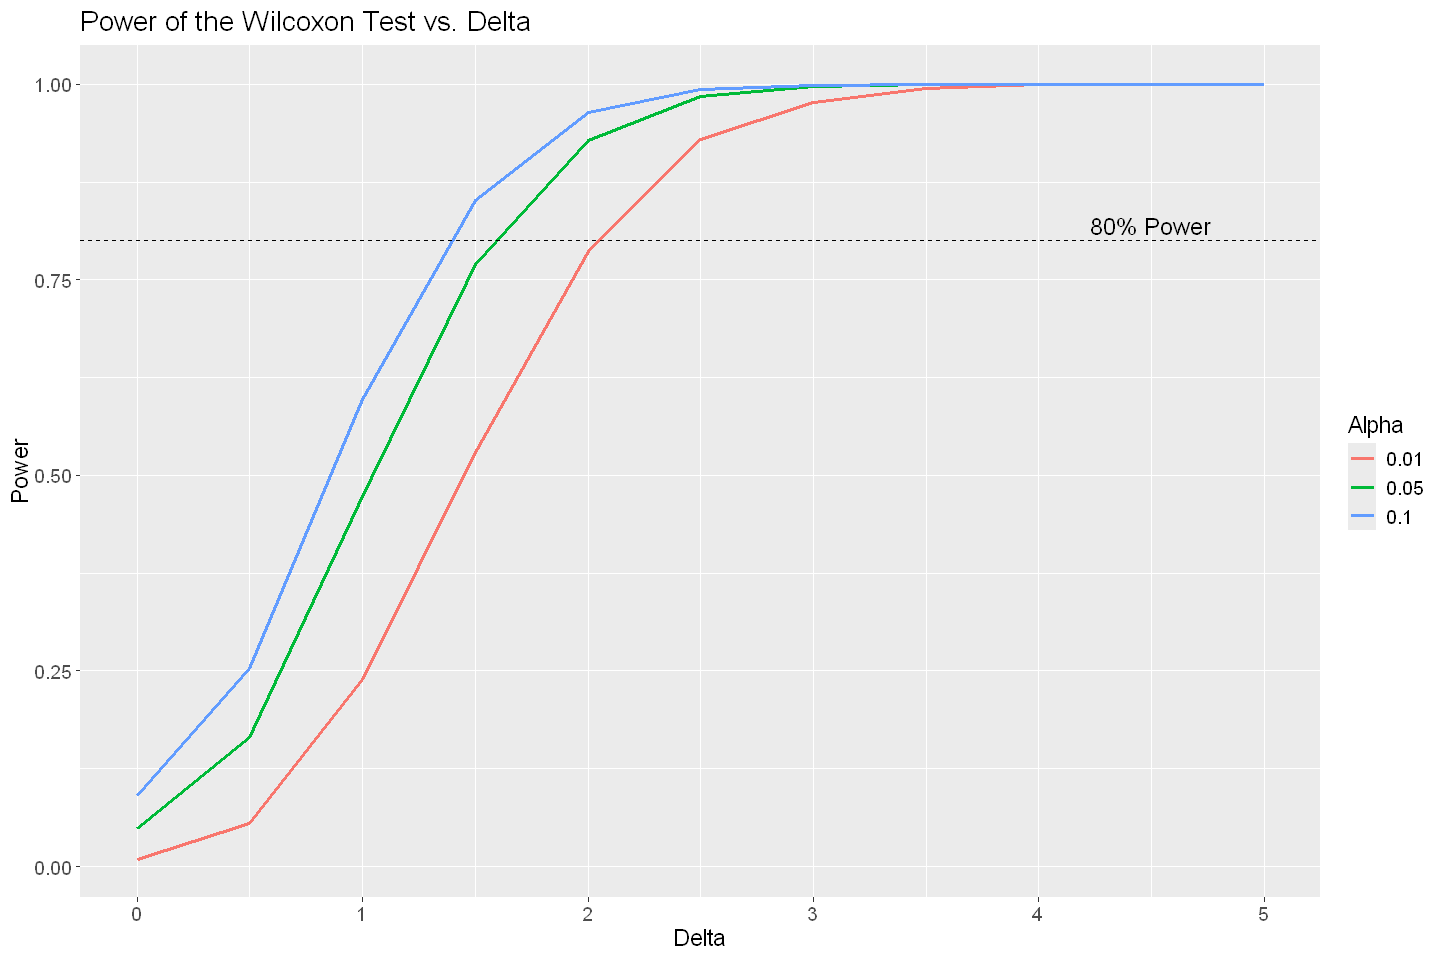

In [22]:
library(ggplot2)

power_df <- as.data.frame(power_results)
power_df$delta <- rownames(power_df)
power_df <- reshape2::melt(power_df, id.vars="delta")
colnames(power_df) <- c("delta", "alpha", "power")
power_df$delta <- as.numeric(as.character(power_df$delta))
power_df$alpha <- as.numeric(as.character(power_df$alpha))

options(repr.plot.width=12, repr.plot.height=8)

# plot the power curves for different alpha levels
ggplot(power_df, aes(x=delta, y=power, color=factor(alpha))) +
    geom_line(linewidth=1) +  
    labs(title="Power of the Wilcoxon Test vs. Delta",
             x="Delta",
             y="Power",
             color="Alpha") +
    geom_hline(yintercept = 0.8, linetype = "dashed", color = "black") +
    annotate("text", x = 4.5, y = 0.82, label = "80% Power", size = 5) +
    theme_gray() + 
    theme(text = element_text(size=14))


### Interpretation:

We estimated the power of the Wilcoxon rank-sum test under the alternative hypothesis $H_1: \mu_1 \ne \mu_2$, assuming the data follow a Laplace distribution with equal variances and a location shift $\Delta = \mu_2 - \mu_1$. The plot shows how power increases with $\Delta$ for different significance levels $\alpha$.

As expected, for all $\alpha$, power increases with $\Delta$ and approaches 1 as the difference becomes large. For fixed $\Delta$, higher $\alpha$ leads to greater power.

A typical benchmark for acceptable power is 80%. From the plot, we see that:

- For $\alpha = 0.1$, power reaches 80% around $\Delta \approx 1.2$,
- For $\alpha = 0.05$, power reaches 80% around $\Delta \approx 1.5$,
- For $\alpha = 0.01$, power reaches 80% closer to $\Delta \approx 2.0$.